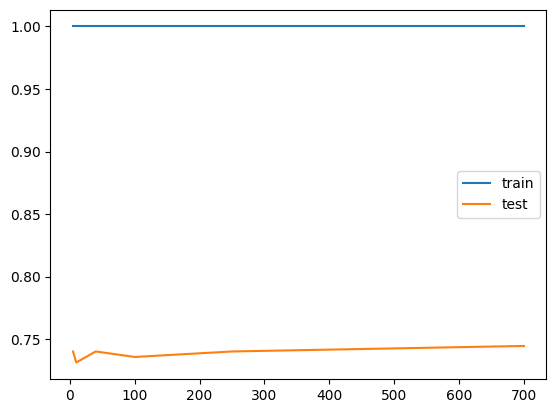

In [1]:
#Using sklearn, apply a stratified 70-30 training-testing split with a fixed seed 
#(random_state=1), and assess in a single plot the training and testing accuracies 
#of a decision tree with no depth limits (and remaining default behavior) for a 
# varying number of selected features in {5,10,40,100,250,700}. Feature 
# selection should be performed before decision tree learning considering 
# the discriminative power of the input variables according to mutual information 
# criterion (mutual_info_classif).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.io.arff import loadarff


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

features = [5,10,40,100,250,700]
train_acc = []
test_acc = []

for i in features:
    mi = mutual_info_classif(X_train, y_train)
    mi = pd.Series(mi)
    mi.index = X_train.columns
    mi.sort_values(ascending=False, inplace=True)
    mi = mi[:i]
    X_train = X_train[mi.index]
    X_test = X_test[mi.index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))


plt.plot(features, train_acc, label='train')
plt.plot(features, test_acc, label='test')
plt.legend()
plt.show()
